# Per-36-Min. Trends for Player

In [1]:
# TODO: create per-36-min. columns; remove all numerical columns that aren't related
# importing libraries
import pandas as pd
import numpy as np
from ipywidgets import widgets
import difflib
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
first_name = input("Please insert the first name of the player you want to see trends for")
last_name = input("Please insert the last name of the player you want to see trends for")
full_name = first_name + " " + last_name

In [3]:
# reading clean file
file_path = "C:/Github Repo/NBA-Analytics/data/basketballProject/cleaned-files/cleaned-data.csv"
clean_df = pd.read_csv(file_path)

In [4]:
# creating df for fuzzy match between user input and existing data
fuzzy_df = pd.DataFrame([full_name],columns=["PLAYER"])

# creating duplicate column of fuzzy name across which match will be made
fuzzy_df["fuzzy_name"] = fuzzy_df["PLAYER"]

# matching and overwriting fuzzy input with best match from existing data
fuzzy_df["PLAYER"] = fuzzy_df["PLAYER"].apply(lambda x: difflib.get_close_matches(x, clean_df["PLAYER"])[0])

# storing name of best match in a variable
predicate_name = fuzzy_df["PLAYER"][fuzzy_df["fuzzy_name"] == full_name][0]

# get subset of player statistics relevant to the name passed in the predicate
relevant_df = clean_df[clean_df["PLAYER"] == predicate_name].reset_index()

In [5]:
for index, row in relevant_df.iterrows():
    season_orig = row["SEASON_ID"]
    season = "'"+row["SEASON_ID"][-2:]
    relevant_df.loc[relevant_df["SEASON_ID"] == season_orig, "SEASON_ID"] = season

In [6]:
relevant_df["FGM"] = 36*relevant_df["FGM"]/relevant_df["MIN"]
relevant_df["FGA"] = 36*relevant_df["FGA"]/relevant_df["MIN"]
relevant_df["FG3M"] = 36*relevant_df["FG3M"]/relevant_df["MIN"]
relevant_df["FG3A"] = 36*relevant_df["FG3A"]/relevant_df["MIN"]
relevant_df["FTM"] = 36*relevant_df["FTM"]/relevant_df["MIN"]
relevant_df["FTA"] = 36*relevant_df["FTA"]/relevant_df["MIN"]
relevant_df["OREB"] = 36*relevant_df["OREB"]/relevant_df["MIN"]
relevant_df["DREB"] = 36*relevant_df["DREB"]/relevant_df["MIN"]
relevant_df["REB"] = 36*relevant_df["REB"]/relevant_df["MIN"]
relevant_df["AST"] = 36*relevant_df["AST"]/relevant_df["MIN"]
relevant_df["STL"] = 36*relevant_df["STL"]/relevant_df["MIN"]
relevant_df["BLK"] = 36*relevant_df["BLK"]/relevant_df["MIN"]
relevant_df["TOV"] = 36*relevant_df["TOV"]/relevant_df["MIN"]
relevant_df["PF"] = 36*relevant_df["PF"]/relevant_df["MIN"]
relevant_df["PTS"] = 36*relevant_df["PTS"]/relevant_df["MIN"]
relevant_df["MOWAR"] = 36*relevant_df["MOWAR"]/relevant_df["MIN"]
relevant_df["MDWAR"] = 36*relevant_df["MDWAR"]/relevant_df["MIN"]
relevant_df["MPWAR"] = 36*relevant_df["MPWAR"]/relevant_df["MIN"]
relevant_df["MIWAR"] = 36*relevant_df["MIWAR"]/relevant_df["MIN"]
relevant_df["MWAR"] = 36*relevant_df["MWAR"]/relevant_df["MIN"]

In [7]:
columns_list = relevant_df.columns.tolist()[3:-2]

In [8]:
default_x_axis = "AGE"
default_y_axis = "PTS"

x_axis_dd = widgets.Dropdown(options = columns_list
                ,value = 'AGE'
                ,description = 'x-axis:'
                )

y_axis_dd = widgets.Dropdown(options = columns_list
                ,value = 'PTS'
                ,description = 'y-axis:'
                )

def dropdownn_handler_x(change):
    global default_x_axis
    default_x_axis = change.new

def dropdownn_handler_y(change):
    global default_y_axis
    default_y_axis = change.new

x_axis_dd.observe(dropdownn_handler_x, names='value')
y_axis_dd.observe(dropdownn_handler_y, names='value')
display(x_axis_dd)
display(y_axis_dd)

Dropdown(description='x-axis:', index=1, options=('SEASON_ID', 'AGE', 'SEASON_NO', 'GP', 'MIN', 'FGM', 'FGA', …

Dropdown(description='y-axis:', index=19, options=('SEASON_ID', 'AGE', 'SEASON_NO', 'GP', 'MIN', 'FGM', 'FGA',…

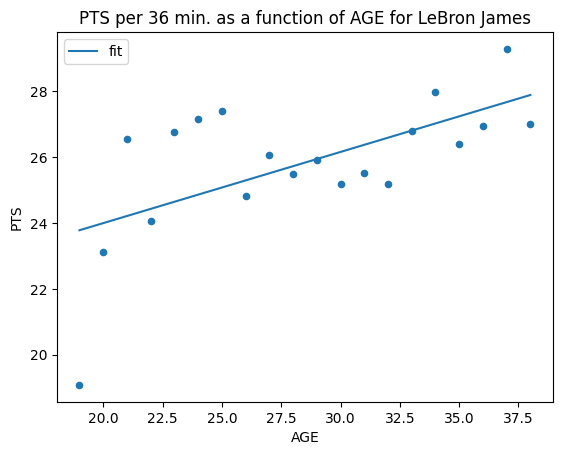

In [9]:
chart_title = default_y_axis + " per 36 min. as a function of "+ default_x_axis + " for " + predicate_name
fig, ax = plt.subplots()
relevant_df.plot(x=default_x_axis, y=default_y_axis, kind="scatter", title=chart_title, ax = ax)
model_formula = default_y_axis + " ~ " + default_x_axis
model = sm.formula.ols(formula=model_formula, data=relevant_df)
res = model.fit()
relevant_df.assign(fit=res.fittedvalues).plot(x=default_x_axis,y='fit',ax=ax)
plt.show()

P.S.: if this isn't the player you are interested in, please try the input again